In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from io import StringIO

In [2]:
data_csv = """Outlook,Temperature,Humidity,Wind,PlayTennis
Sunny,Hot,High,Weak,No
Sunny,Hot,High,Strong,No
Overcast,Hot,High,Weak,Yes
Rain,Mild,High,Weak,Yes
Rain,Cool,Normal,Weak,Yes
Rain,Cool,Normal,Strong,No
Overcast,Cool,Normal,Strong,Yes
Sunny,Mild,High,Weak,No
Sunny,Cool,Normal,Weak,Yes
Rain,Mild,Normal,Weak,Yes
Sunny,Mild,Normal,Strong,Yes
Overcast,Mild,High,Strong,Yes
Overcast,Hot,Normal,Weak,Yes
Rain,Mild,High,Strong,No
"""

In [3]:
data = pd.read_csv(StringIO(data_csv))

In [4]:
print("Dataset Overview:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe(include='all'))

Dataset Overview:
    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

Summary Statistics:
       Outlook Temperature Humidity  Wind PlayTennis
count       14          14       14    14         14
unique       3           3        2     2          2
top      Sunny        Mild     High  Weak        Yes
freq         5           6        7     8          9


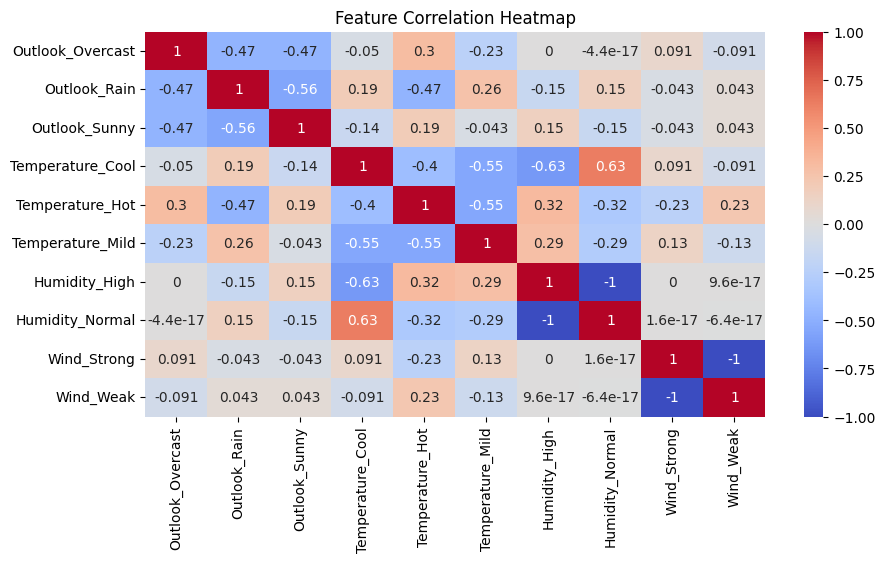

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.get_dummies(data.drop(columns=['PlayTennis'])).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

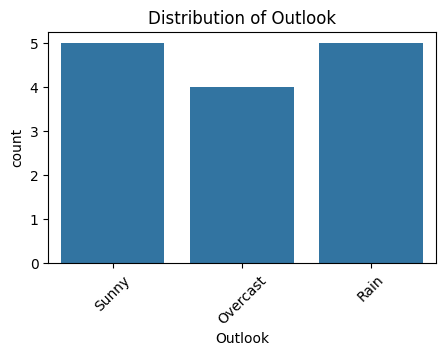

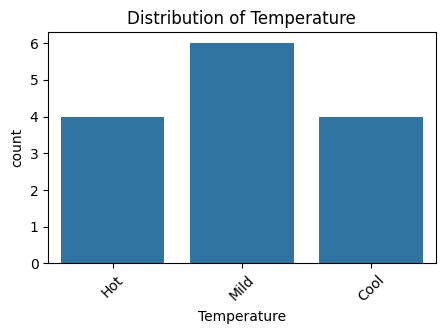

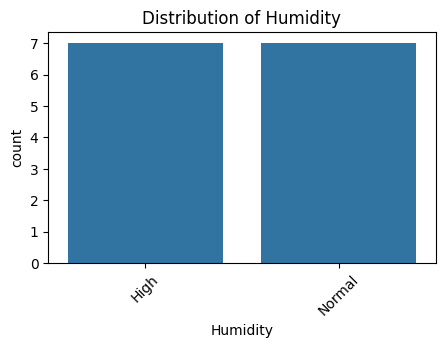

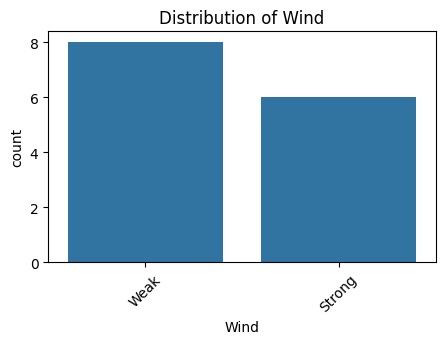

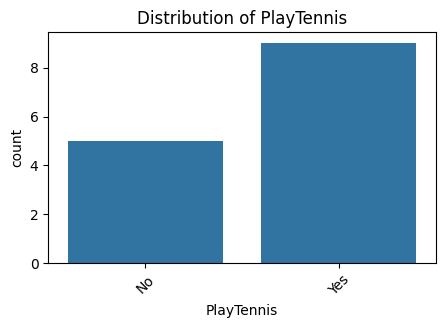

In [6]:
for column in data.columns:
    if data[column].dtype == 'object': # Categorical features
        plt.figure(figsize=(5, 3))
        sns.countplot(x=column, data=data)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.show()

In [7]:
from itertools import product

In [8]:
def find_consistent_hypotheses(data):
    features = data.columns[:-1] # Exclude target column
    target = data.columns[-1]
    positive_examples = data[data[target] == 'Yes']
    domain = [data[col].unique().tolist() for col in features]
    # Generate all possible hypotheses
    all_hypotheses = list(product(*domain))
    print(f"Total Hypotheses Generated: {len(all_hypotheses)}") # Debugging Print
    # Filter only those consistent with positive examples
    consistent_hypotheses = []
    for h in all_hypotheses:
        match = all((row[features].values == list(h)).all() for _, row in positive_examples.iterrows())
        if match:
            consistent_hypotheses.append(h)
    print(f"Total Consistent Hypotheses Found: {len(consistent_hypotheses)}") # Debugging Print
    return consistent_hypotheses

In [9]:
# Run the function
consistent_hypotheses = find_consistent_hypotheses(data)
print("\nConsistent Hypotheses:")
for hyp in consistent_hypotheses:
    print(hyp)

Total Hypotheses Generated: 36
Total Consistent Hypotheses Found: 0

Consistent Hypotheses:
